In [3]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

## Primeiro turno

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data1 = read_csv('/content/drive/MyDrive/Projeto_Observatorio_FakeNews/GEP/complet_1turn.csv', low_memory=False)
data1.head(2)

,text,text_clear,token,nota_senticnet,nota_senticnet_scaler,senti,is_lula,is_bolso
0,2 pessoas estao assistindo a minha transmissao...,pesso esta assist transmissa viv urlkvw4swxp4r,"['pessoas', 'estao', 'assistindo', 'transmissa...",23.634,0.220856,positivo,nop,nop
1,rt cleytonreisreal elianebusolaro flaviobolson...,cleytonreisre elianebusolar flaviobolsonar nao...,"['cleytonreisreal', 'elianebusolaro', 'flaviob...",-26.473,-0.399400,negativo,lula,bolso


In [6]:
data1['is_bolso'].value_counts()

nop      1471078
bolso     302155
Name: is_bolso, dtype: int64

In [7]:
data1.loc[data1['is_bolso'] == 'bolso', 'senti'].value_counts() / data1['is_bolso'].value_counts()[1] * 100

negativo    49.588456
positivo    29.028810
neutro      21.382734
Name: senti, dtype: float64

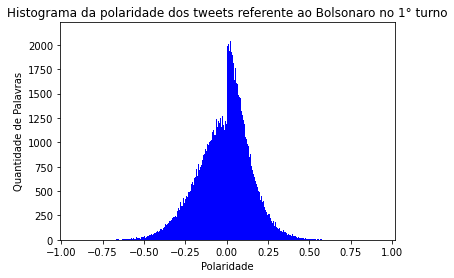

In [8]:
x = data1.loc[data1['is_bolso'] == 'bolso', 'nota_senticnet_scaler']
plt.hist(x=x, bins=1000, facecolor="blue")
plt.title("Histograma da polaridade dos tweets referente ao Bolsonaro no 1° turno")
plt.xlabel("Polaridade")
plt.ylabel("Quantidade de Palavras");

In [9]:
data1['is_lula'].value_counts()

nop     1052289
lula     720944
Name: is_lula, dtype: int64

In [10]:
data1.loc[data1['is_lula'] == 'lula', 'senti'].value_counts() / data1['is_lula'].value_counts()[1] * 100

negativo    39.512362
positivo    36.500755
neutro      23.986884
Name: senti, dtype: float64

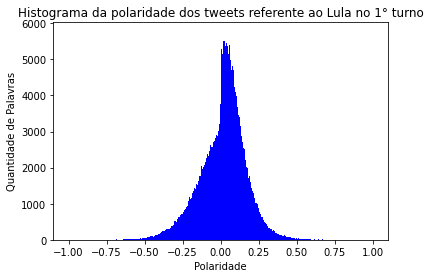

In [11]:
x = data1.loc[data1['is_lula'] == 'lula', 'nota_senticnet_scaler']
plt.hist(x=x, bins=1000, facecolor="blue")
plt.title("Histograma da polaridade dos tweets referente ao Lula no 1° turno")
plt.xlabel("Polaridade")
plt.ylabel("Quantidade de Palavras");

In [12]:
freq1 = FreqDist([y for x in data1["token"] for y in eval(x)])
freq1_more = DataFrame(freq1.most_common(50))

In [13]:
# DataFrame({(m, n) for m, n in freq1.items()}).to_csv("frequencia_1turn")

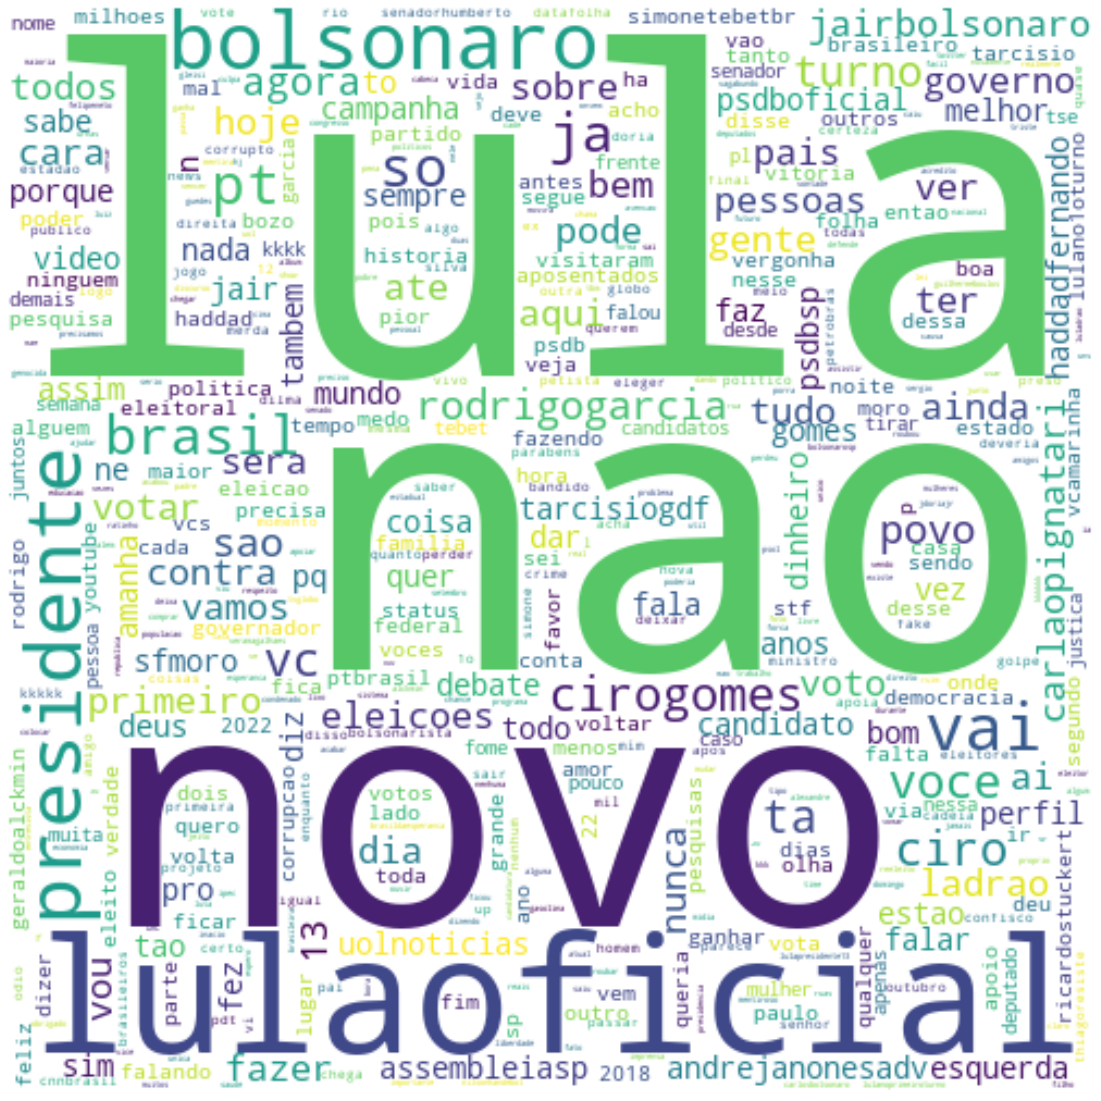

In [14]:
wc = WordCloud(background_color="white", max_words=500,
                   max_font_size=256, random_state=42, width=500, height=500)
wc.generate_from_frequencies(freq1)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

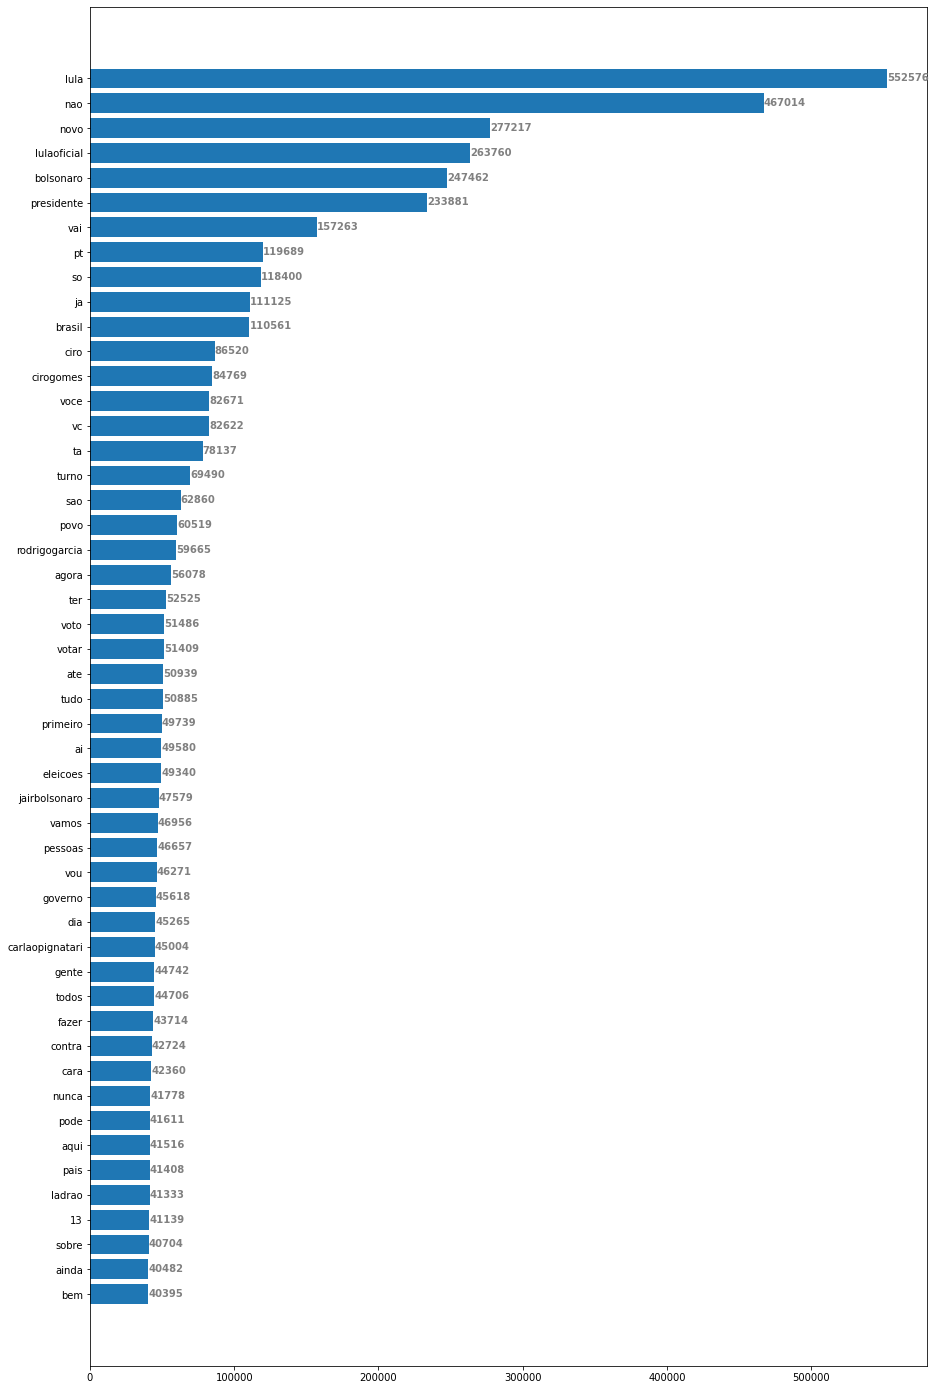

In [15]:
fig, ax = plt.subplots(figsize= (15,25))
ax.barh(freq1_more[0], freq1_more[1])
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

In [16]:
fig = px.bar(freq1_more, x=0, y=1, text_auto='.2s',
             title='As 50 palavras mais frequentes')
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title={'xanchor': 'center', 'yanchor': 'top', 'x': .5})
fig.show()

## Segundo turno

In [17]:
data2 = read_csv('/content/drive/MyDrive/Projeto_Observatorio_FakeNews/GEP/complet_2turn.csv', low_memory=False)
data2.head(2)

,text,text_clear,token,nota_senticnet,nota_senticnet_scaler,senti,is_lula,is_bolso
0,"rt @lolaescreva: vamulá, nordeste do meu coraç...",lolaescrev vamul nord coraca nao vot ode dig n...,"['lolaescreva', 'vamula', 'nordeste', 'coracao...",15.942,0.215403,positivo,lula,nop
1,"rt @ptsaopaulosp: nesta sexta-feira (7), às 18...",ptsaopaulosp nest sextaf 18h plen arranc lul h...,"['ptsaopaulosp', 'nesta', 'sextafeira', '18h',...",-8.368,-0.162665,negativo,lula,nop


In [18]:
data2['is_bolso'].value_counts()

nop      751227
bolso    145558
Name: is_bolso, dtype: int64

In [19]:
data2.loc[data2['is_bolso'] == 'bolso', 'senti'].value_counts() / data2['is_bolso'].value_counts()[1] * 100

negativo    52.512401
positivo    26.959700
neutro      20.527900
Name: senti, dtype: float64

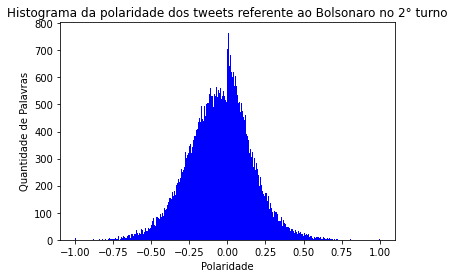

In [29]:
x = data2.loc[data2['is_bolso'] == 'bolso', 'nota_senticnet_scaler']
plt.hist(x=x, bins=1000, facecolor="blue")
plt.title("Histograma da polaridade dos tweets referente ao Bolsonaro no 2° turno")
plt.xlabel("Polaridade")
plt.ylabel("Quantidade de Palavras");

In [21]:
data2['is_lula'].value_counts()

nop     457267
lula    439518
Name: is_lula, dtype: int64

In [22]:
data2.loc[data2['is_lula'] == 'lula', 'senti'].value_counts() / data2['is_lula'].value_counts()[1] * 100

negativo    38.418222
positivo    36.191009
neutro      25.390769
Name: senti, dtype: float64

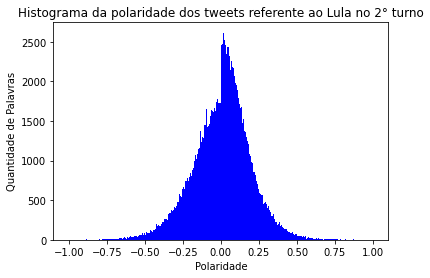

In [23]:
x = data2.loc[data2['is_lula'] == 'lula', 'nota_senticnet_scaler']
plt.hist(x=x, bins=1000, facecolor="blue")
plt.title("Histograma da polaridade dos tweets referente ao Lula no 2° turno")
plt.xlabel("Polaridade")
plt.ylabel("Quantidade de Palavras");

In [24]:
freq2 = FreqDist([y for x in data2["token"] for y in eval(x)])
freq2_more = DataFrame(freq2.most_common(50))

In [25]:
# DataFrame({(m, n) for m, n in freq2.items()}).to_csv("frequencia_2turn")

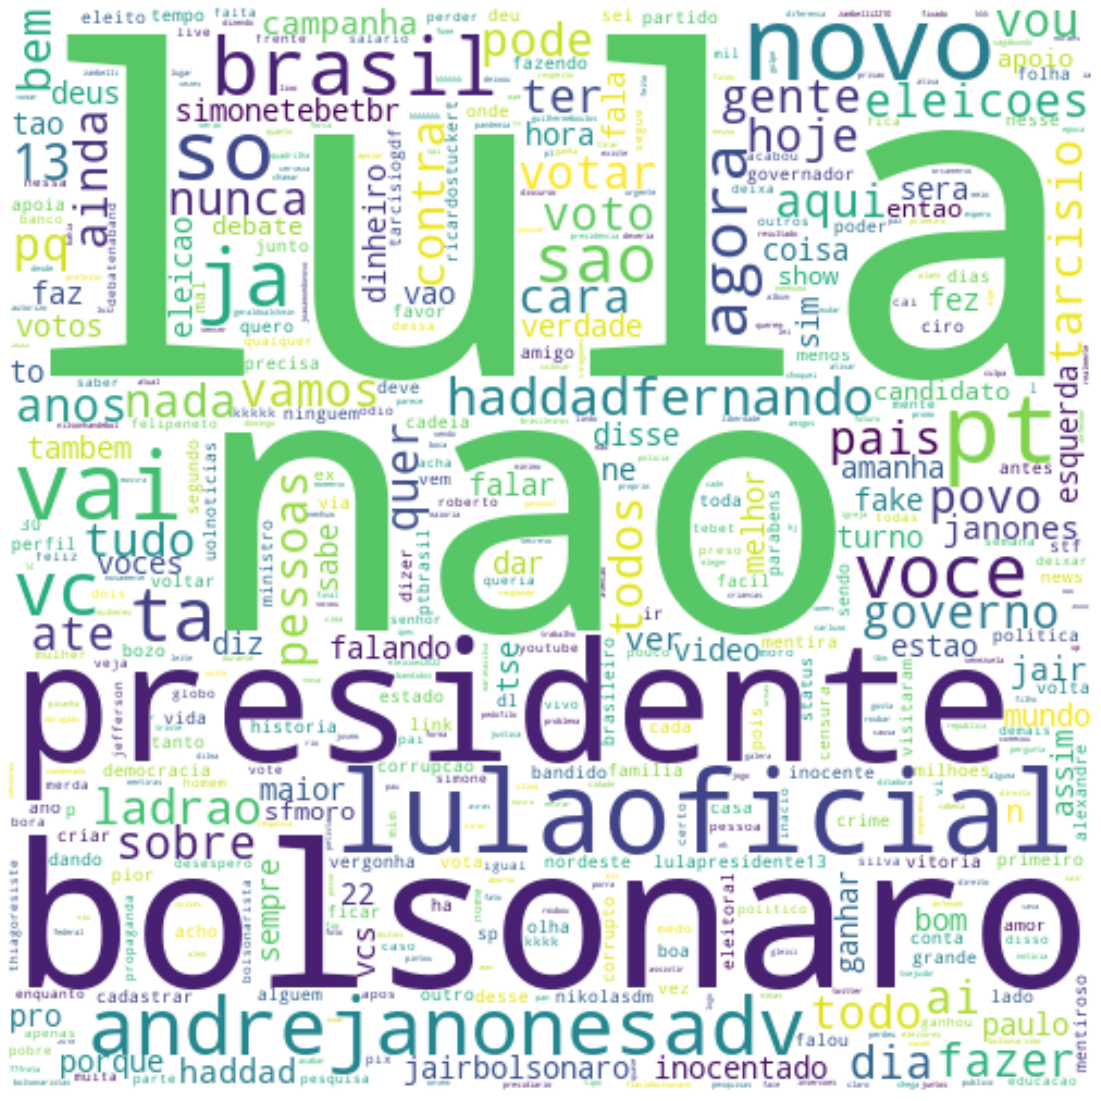

In [26]:
wc = WordCloud(background_color="white", max_words=500,
                   max_font_size=256, random_state=42, width=500, height=500)
wc.generate_from_frequencies(freq2)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

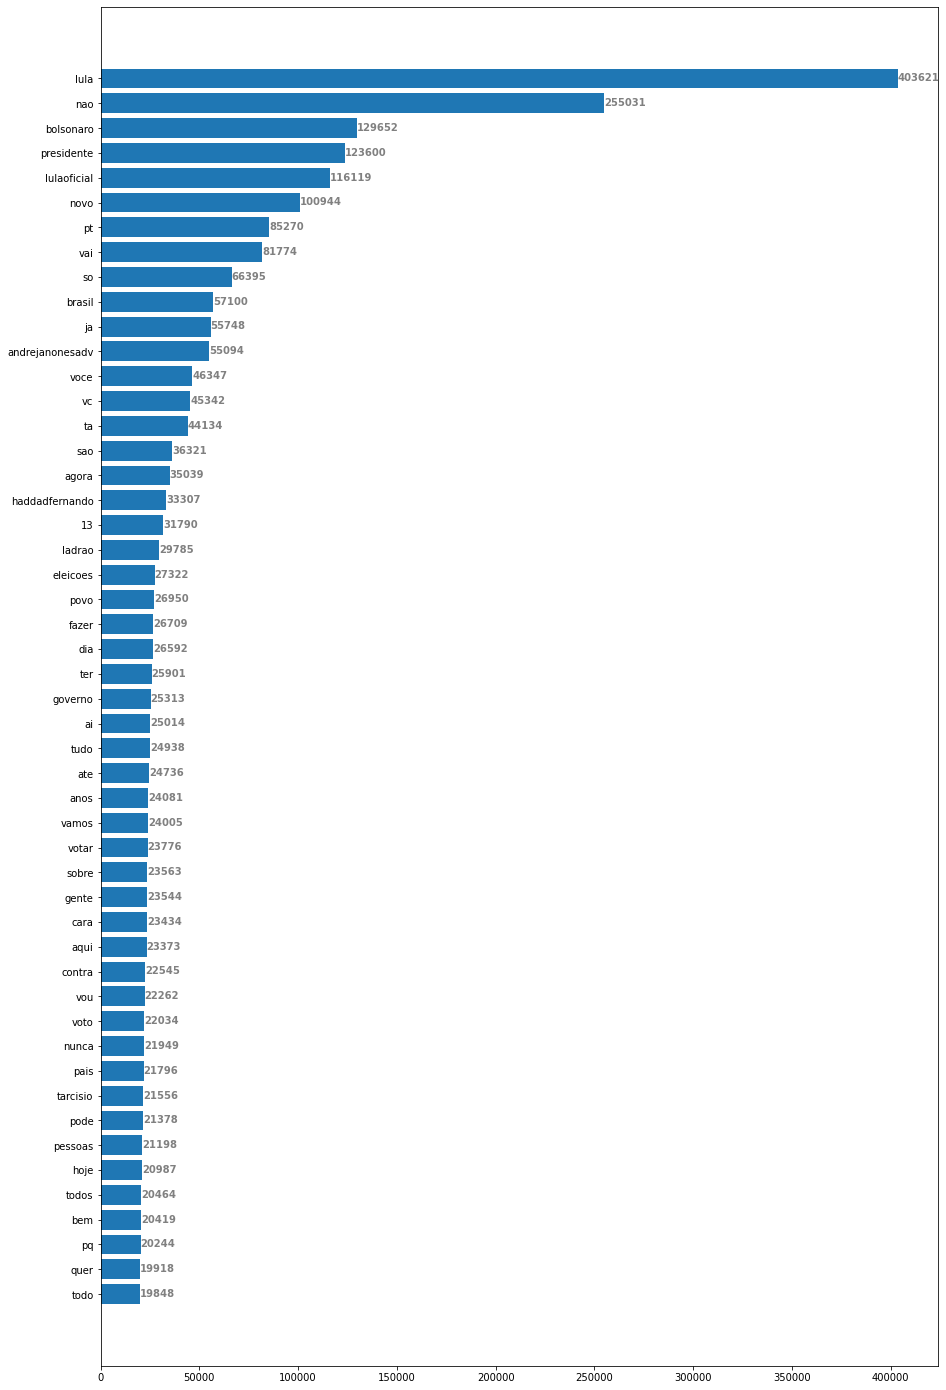

In [27]:
fig, ax = plt.subplots(figsize= (15,25))
ax.barh(freq2_more[0], freq2_more[1])
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

In [28]:
fig = px.bar(freq2_more, x=0, y=1, text_auto='.2s',
             title='As 50 palavras mais frequentes')
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title={'xanchor': 'center', 'yanchor': 'top', 'x': .5})
fig.show()